In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sn

import missingno as msno

from datetime import datetime

import matplotlib.pyplot as plt

import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.style.use("seaborn")
%matplotlib inline

# Reading the data

In [2]:
data = pd.read_csv('hour.csv', sep = ',')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Separate the date

In [3]:
seasonMap = {1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" }
weatherMap = {1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
              2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
              3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
              4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " }

data["date"] = data.dteday.apply(lambda x : x.split()[0])
data["weekday"] = data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data["season"] = data.season.map(seasonMap)
data["weather"] = data.weathersit.map(weatherMap)

In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,weather
0,1,2011-01-01,Spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...
1,2,2011-01-01,Spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...
2,3,2011-01-01,Spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...
3,4,2011-01-01,Spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...
4,5,2011-01-01,Spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...


In [5]:
categoryVariableList  = ["hr","weekday","mnth","season","weather","holiday","workingday"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")
    
data = data.drop(["dteday"],axis=1)

# Missing data detection

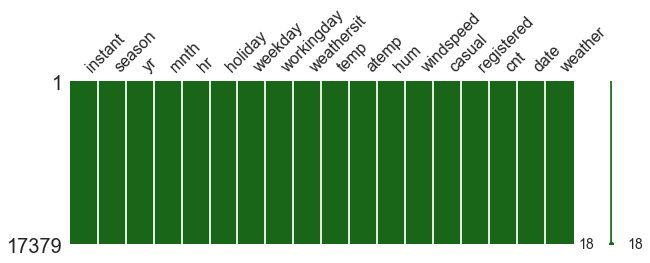

In [6]:
msno.matrix(data,figsize=(10,3), color = (0.1, 0.4, 0.1))

# Distribution

## Distribution Points

In [7]:
data['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

## Output Distribution

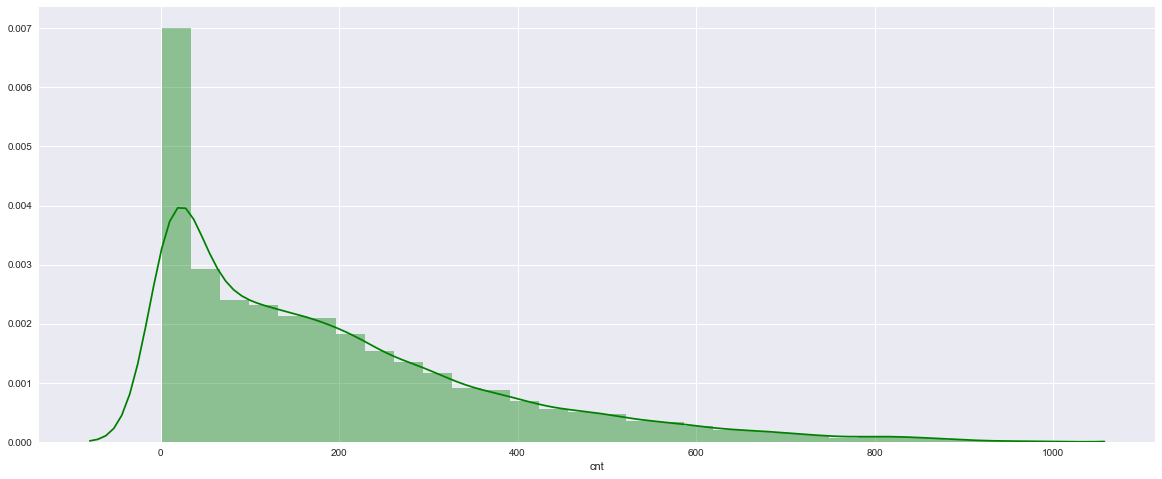

In [8]:
plt.figure(figsize=(20, 8))
sn.distplot(data['cnt'], color='g', bins=30, hist_kws={'alpha': 0.4});

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E4BBCE388>,
      dtype=object)

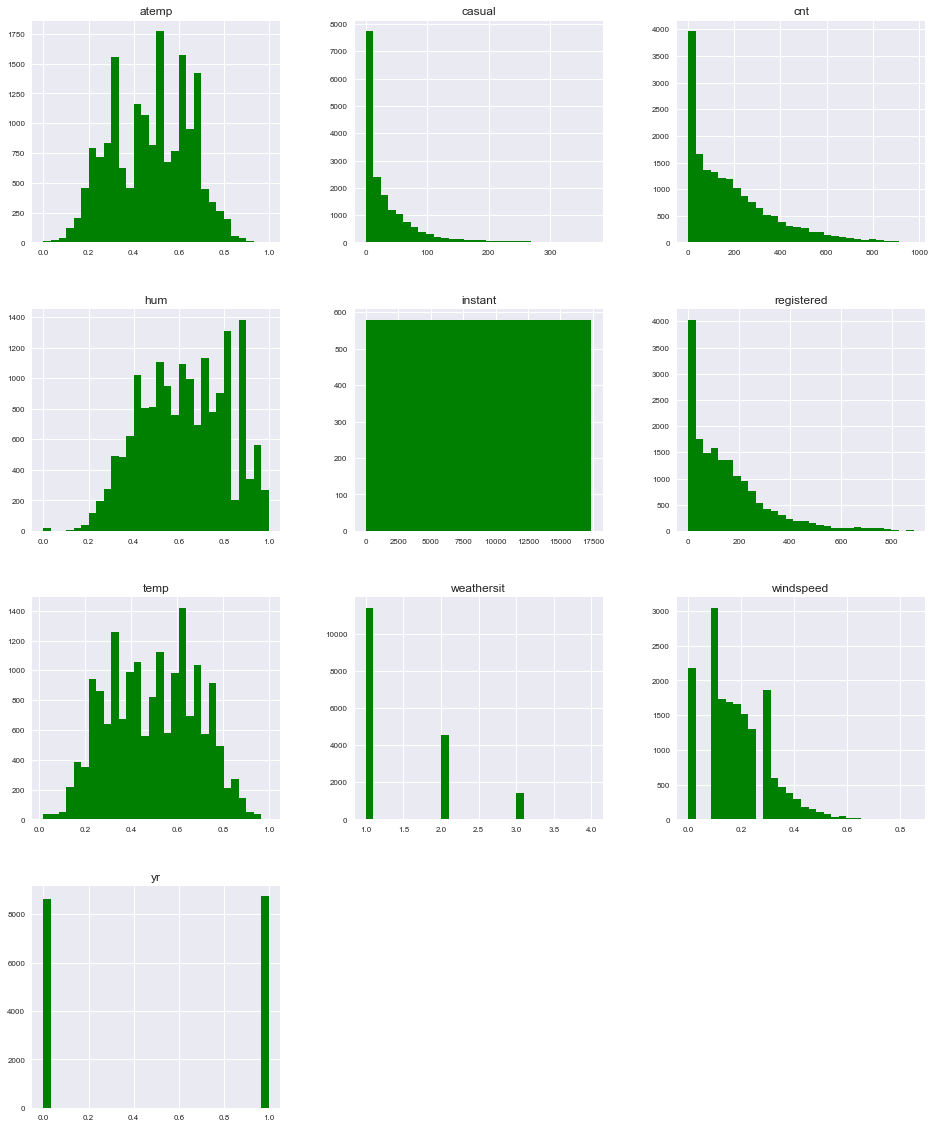

In [9]:
numerical_features = data.select_dtypes(include = ['float64', 'int64'])
numerical_features.hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

In [10]:
data.median()

instant       8690.0000
yr               1.0000
mnth             7.0000
hr              12.0000
holiday          0.0000
workingday       1.0000
weathersit       1.0000
temp             0.5000
atemp            0.4848
hum              0.6300
windspeed        0.1940
casual          17.0000
registered     115.0000
cnt            142.0000
dtype: float64

In [11]:
data.mode()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,weather
0,1,Fall,1.0,5,16,0,Saturday,1,1.0,0.62,0.6212,0.88,0.0,0.0,4.0,5.0,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...
1,2,NaN,NaN,7,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-08,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-09,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-10,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17375,17376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,17377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,17378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64